In [4]:
import os

notebook_path=os.getcwd()
print(notebook_path)

C:\Users\Administrator


In [1]:
import pandas as pd
import pytz

#creating a function to make it easy to read the data

def wrangle(filepath):
    
#reading the data from a CSV file into a dataframe
    df= pd.read_csv(filepath)
    
#splitting the data into 8 different columns as separated by semicolons

    df[["sensor_id", "sensor_type", "location","lat", "lon", "timestamp", "value_type", "value"]]= df["sensor_id;sensor_type;location;lat;lon;timestamp;value_type;value"].str.split(";", expand=True)

#drop the long str colum
    df.drop(columns=["sensor_id;sensor_type;location;lat;lon;timestamp;value_type;value"], inplace=True)
    

#masking the data frame to obtain only PM2.5 readings
    
    mask_valuetype= df["value_type"]=="P2"
    
    df=df[mask_valuetype]
    
#the columns needed are timestamp, value_type, and value

    df.drop(columns=["sensor_id", "sensor_type", "location", "lat", "lon"], inplace=True)
    
#dropping the value_type column since the df is already masked to PM2.5 values

    df.drop(columns=["value_type"], inplace=True)
    
#changing the datatypes of the columns
    
    df["timestamp"]=pd.to_datetime(df["timestamp"])
    
    df["value"]= df["value"].astype(float)

#setting the index of the dataframe to timestamp

    df= df.set_index("timestamp")
    
    df.index=df.index.tz_convert("Africa/Lagos")
    
    df= df.reset_index()
    
#resampling the data to a 1 hr window

    df=df["value"].resample("1H").mean().fillna(method="ffill")
    

    return df

In [2]:
#reading several csv files into a single dataframe using pattern matching
from glob import glob

#using glob to obtain matched datasets

'''Use the r before the filepath to avoid getting a unicode error'''

files= glob(r"C:\Users\Administrator\Downloads\sensor_data_*.csv")
files

#using the wrangle function above to read all the files into a frames list

frames=[]
for file in files:
    df= wrangle(file)
    frames.append(df)
    
frames

#use concat to read the data into a single dataframe

df= pd.concat(frames, ignore_index=True)
df.head()

#checking if there are any null values
df.isnull().sum()    

'''There are no null values'''

#checking the length of the dataframe...36489

len(df)

df.head()



TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

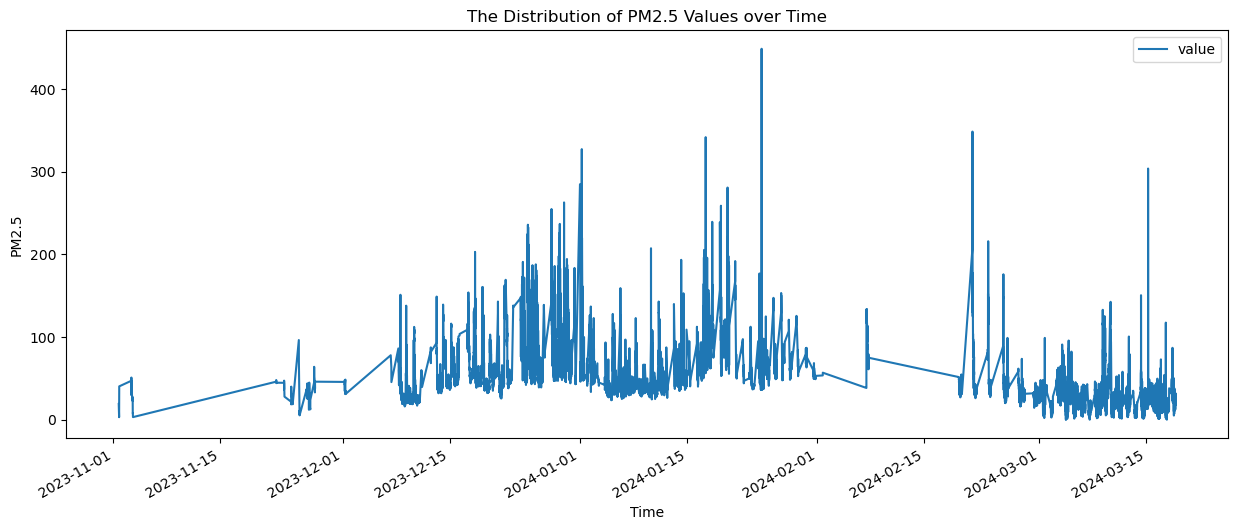

In [9]:
#visualizing PM2.5 readings
import matplotlib.pyplot as plt

fig, ax= plt.subplots(figsize=(15,6))
df.plot(x="timestamp", y="value", xlabel="Time", ylabel="PM2.5", title="The Distribution of PM2.5 Values over Time", ax=ax)
plt.show()



In [10]:
max(df["value"])

449.0